<a href="https://colab.research.google.com/github/JoshFowles/Lab-13/blob/main/Lab_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Module 6 Script Lab 13

## Objectives

What do you need to know for this module's project?

1. Fit a tree model using all the available predictors. 
2. Create a confusion matrix  and identify numbers of TP, FP, TN and FN.
3. Estimate profit (benefits - costs) using a defined cost-benefit matrix and the above confusion matrix.
4. Estimate profit for a strategy that consists in calling everyone.
5. Estimate profit for a class decision threshold of .3 
6.  Use the model to predict on a new dataset (without the target), then use these predictions to identify those who should be called--a contact list.
7.  Make a recommendation to the Director of Sales based on your analytic work.

**NOTE:** For the module 5 project you will predict answering for prospective customers (who have not yet been called). Consequently, the assignment requires an additional dataset, customer_data.csv, that you will need to download and move into your project folder.  Here is code to load that data into memory after you have it saved in your project folder (your working directory). This code is included in the template script.

We will again use the MegaTelCo data for this demonstration.

##Load Libraries

In this class we will be using 
- Pandas
- Scikitlearn
- Matplotlib


In [11]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, export_graphviz # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics  #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix


## Getting data into Pandas

In this case we will load data from the statsmodels.org library

See the Canvas assignments and lectures for a description of the Megatelco data

**Note:** you will need to enter a code supplied by Google in the next step. 


In [12]:
from google.colab import drive 
drive.mount('/content/gdrive', force_remount=True)



Mounted at /content/gdrive


In [13]:
df = pd.read_csv (r'/content/gdrive/MyDrive/Colab Notebooks/retail_dataset.csv')

In [14]:
#look at the top rows
df.head(10) 

,customer_id,customer_name,address_line_1,city,state_province,postal_code,order_id,order_date,customer_id.1,order_id.1,product_id,quantity,product_id.1,product_name,product_price,total_amount,order_year_month,order_month
0,67,Gordy Matteau,59 Northland Circle,Wilmington,DE,19805.0,1001,2020-01-11,67,1001,106,3.0,106,Great value Juice,$1.99,$5.97,2020-01,January
1,201,Cort Paskerful,769 Buell Drive,Huntsville,AL,35810.0,1002,2019-11-22,201,1002,104,2.0,104,Desk,$85.98,$171.96,2019-11,November
2,45,Willetta Lumley,41 Ridgeway Alley,Irvine,CA,92612.0,1003,2019-09-17,45,1003,107,5.0,107,Dove deodorant,$3.99,$19.95,2019-09,September
3,106,Alison Batterton,489 Erie Hill,Richmond,VA,23293.0,1004,2019-12-09,106,1004,106,8.0,106,Great value Juice,$1.99,$15.92,2019-12,December
4,357,Martelle Paxeford,451 Manitowish Place,Richmond,VA,23293.0,1005,2019-06-08,357,1005,107,7.0,107,Dove deodorant,$3.99,$27.93,2019-06,June
5,351,Glenn Reville,3 Springview Drive,Dallas,TX,75277.0,1006,2020-02-18,351,1006,106,4.0,106,Great value Juice,$1.99,$7.96,2020-02,February
6,233,Cosette Berkowitz,7619 Susan Lane,South Bend,IN,46634.0,1007,2019-10-25,233,1007,105,2.0,105,Office Chair,$55.99,$111.98,2019-10,October
7,121,Nisse Cunniam,0 Dennis Pass,Lincoln,NE,68531.0,1008,2019-11-10,121,1008,101,1.0,101,Dell E5470 Laptop,$485.00,$485.00,2019-11,November
8,232,Yank Eayrs,8176 Lawn Drive,Washington,DC,20575.0,1009,2019-09-27,232,1009,110,1.0,110,Apple iPad Mini,$329.99,$329.99,2019-09,September
9,113,Jamesy Brothwood,0693 Evergreen Pass,Scranton,PA,18514.0,1010,2019-09-02,113,1010,108,1.0,108,Printer,$59.99,$59.99,2019-09,September


In [15]:
#look at the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9569 entries, 0 to 9568
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       9569 non-null   int64  
 1   customer_name     9569 non-null   object 
 2   address_line_1    9448 non-null   object 
 3   city              9516 non-null   object 
 4   state_province    9569 non-null   object 
 5   postal_code       9416 non-null   float64
 6   order_id          9569 non-null   int64  
 7   order_date        9312 non-null   object 
 8   customer_id.1     9569 non-null   int64  
 9   order_id.1        9569 non-null   int64  
 10  product_id        9569 non-null   int64  
 11  quantity          9513 non-null   float64
 12  product_id.1      9569 non-null   int64  
 13  product_name      9569 non-null   object 
 14  product_price     9569 non-null   object 
 15  total_amount      9513 non-null   object 
 16  order_year_month  9312 non-null   object 


In [16]:
#describe the data before cleaning it
df.describe()

,customer_id,postal_code,order_id,customer_id.1,order_id.1,product_id,quantity,product_id.1
count,9569.000000,9416.000000,9569.000000,9569.000000,9569.000000,9569.000000,9513.000000,9569.000000
mean,282.910962,52225.007116,5107.539450,282.910962,5107.539450,106.736650,3.453380,106.736650
std,199.763947,29619.544418,2043.449403,199.763947,2043.449403,3.694805,4.393894,3.694805
min,1.000000,1105.000000,1001.000000,1.000000,1001.000000,101.000000,1.000000,101.000000
25%,127.000000,27409.000000,3393.000000,127.000000,3393.000000,104.000000,1.000000,104.000000
50%,253.000000,48295.000000,5577.000000,253.000000,5577.000000,107.000000,1.000000,107.000000
75%,376.000000,79923.000000,6829.000000,376.000000,6829.000000,110.000000,4.000000,110.000000
max,800.000000,99812.000000,8147.000000,800.000000,8147.000000,114.000000,20.000000,114.000000


In [17]:
df['quantity'
].unique()

array([ 3.,  2.,  5.,  8.,  7.,  4.,  1.,  6.,  9., 11., 13., 20., 12.,
       18., 15., 19., 14., 10., 17., 16., nan])

## Clean up the data
Did you notice anything unusual about the "house" amounts? 

How about the handset price and income?

Clean up the data in a  new datafram named "df_clean"


In [18]:


#delete any rows with missing values in the clean dataframe
df_clean = df.dropna() 

df_clean.describe()

,customer_id,postal_code,order_id,customer_id.1,order_id.1,product_id,quantity,product_id.1
count,8981.000000,8981.000000,8981.000000,8981.000000,8981.000000,8981.000000,8981.000000,8981.000000
mean,268.464982,52230.965371,4974.766173,268.464982,4974.766173,106.688231,3.344394,106.688231
std,189.860282,29663.530626,2034.447409,189.860282,2034.447409,3.657543,4.244108,3.657543
min,1.000000,1105.000000,1001.000000,1.000000,1001.000000,101.000000,1.000000,101.000000
25%,121.000000,27404.000000,3246.000000,121.000000,3246.000000,104.000000,1.000000,104.000000
50%,243.000000,48295.000000,5430.000000,243.000000,5430.000000,107.000000,1.000000,107.000000
75%,362.000000,79923.000000,6675.000000,362.000000,6675.000000,110.000000,4.000000,110.000000
max,800.000000,99812.000000,8147.000000,800.000000,8147.000000,114.000000,20.000000,114.000000


#Create a Linear Regression based on order month

In [19]:
from sklearn.linear_model import LinearRegression

In [25]:
# replace the dollar sign with an empty string
df_clean['total_amount'] = df_clean['total_amount'].str.replace('[$,]', '')

# convert the resulting strings to floats
df_clean['total_amount'] = df_clean['total_amount'].astype(float)

<ipython-input-25-1a9e1115e71f>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_clean['total_amount'] = df_clean['total_amount'].str.replace('[$,]', '')
<ipython-input-25-1a9e1115e71f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['total_amount'] = df_clean['total_amount'].str.replace('[$,]', '')
<ipython-input-25-1a9e1115e71f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['total_amount'] = df_clean['total_amount'].astype(float)


In [30]:
import matplotlib.pyplot as plt

<ipython-input-31-4b6f080f7e99>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['order_month'] = X['order_month'].str.strip()
<ipython-input-31-4b6f080f7e99>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['order_month'] = pd.to_datetime(X['order_month'], format='%B').dt.month


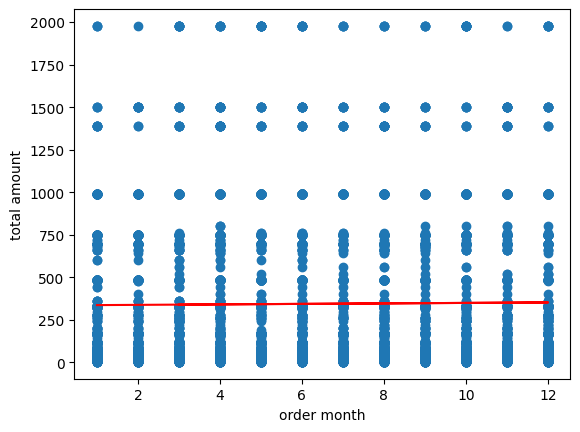

In [31]:
X = df_clean[['order_month']]
X['order_month'] = X['order_month'].str.strip()
X['order_month'] = pd.to_datetime(X['order_month'], format='%B').dt.month

grouped_data = df_clean.groupby('order_month')['total_amount'].mean()

Y = df_clean[['total_amount']]

model = LinearRegression()

model.fit(X, Y)
plt.scatter(X['order_month'], Y)

# overlay the regression line on the scatter plot
plt.plot(X['order_month'], model.predict(X), color='red')

# set the labels for the x and y axes
plt.xlabel('order month')
plt.ylabel('total amount')

# display the plot
plt.show()

# Standardize attributes

- Convert "college" to 0,1
- Convert reported_satisfaction to 1,2,3
- Convert reported_usage_level to 1,2,3
- Convert considering_change_of_plan to 0,1
- Convert leave to 0,1

I'm going to leave the "leave" variable in place, just in case I need the original value

In [ ]:
df_clean.loc[df_clean['college'] == 'one', 'college'] = "1" 
df_clean.loc[df_clean['college'] == 'zero', 'college'] = "0"
df_clean.loc[df_clean['reported_satisfaction'] == 'low', 'reported_satisfaction'] = "1"
df_clean.loc[df_clean['reported_satisfaction'] == 'avg', 'reported_satisfaction'] = "2"
df_clean.loc[df_clean['reported_satisfaction'] == 'high', 'reported_satisfaction'] = "3"
df_clean.loc[df_clean['reported_usage_level'] == 'low', 'reported_usage_level'] = "1"
df_clean.loc[df_clean['reported_usage_level'] == 'avg', 'reported_usage_level'] = "2"
df_clean.loc[df_clean['reported_usage_level'] == 'high', 'reported_usage_level'] = "3"
df_clean.loc[df_clean['considering_change_of_plan'] == 'yes', 'considering_change_of_plan'] = "1"
df_clean.loc[df_clean['considering_change_of_plan'] == 'no', 'considering_change_of_plan'] = "0"
df_clean.loc[df_clean['considering_change_of_plan'] == 'maybe', 'considering_change_of_plan'] = "0.5"

df_clean['college'] = df_clean['college'].astype('int') 
df_clean['reported_satisfaction'] = df_clean['reported_satisfaction'].astype('int') 
df_clean['reported_usage_level'] = df_clean['reported_usage_level'].astype('int') 
df_clean['considering_change_of_plan'] = df_clean['considering_change_of_plan'].astype('float') 

#Add new field with binary value for leave  
df_clean['leave_flag'] = df_clean['leave'].str.replace('STAY','0')  
df_clean['leave_flag'] = df_clean['leave_flag'].str.replace('LEAVE','1')
df_clean['leave_flag'] = df_clean['leave_flag'].astype('int')
df_clean['leave_flag'] = df_clean['leave_flag'].astype('bool')

df_clean.head(10) 

,college,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,reported_satisfaction,reported_usage_level,considering_change_of_plan,leave,id,leave_flag
0,1,23859,70,0,519105,154,5.0,8,1,1,1.0,LEAVE,8183,True
1,0,72466,67,16,271182,262,5.0,5,1,1,1.0,LEAVE,12501,True
2,0,30883,60,0,647281,211,3.0,8,1,1,1.0,STAY,7425,False
3,1,44512,0,22,754958,232,0.0,5,1,1,0.0,LEAVE,13488,True
4,0,70535,0,0,653421,310,0.0,14,1,1,1.0,STAY,11389,False
5,0,143987,0,56,896544,778,5.0,1,1,3,1.0,STAY,14674,False
6,1,96668,79,24,259329,365,5.0,6,1,2,1.0,LEAVE,19100,True
7,1,50083,0,0,160335,266,5.0,10,1,3,1.0,STAY,18170,False
8,1,104392,0,0,247836,778,1.0,8,3,1,0.0,LEAVE,3201,True
9,1,37852,0,74,264893,857,0.0,2,1,1,1.0,LEAVE,12612,True


# Convert attributes to factors

- Leave
- College
- Reported satisfaction
- Reported usage level
- Considering change of plan

In [ ]:
df_clean['leave'] = df_clean['leave'].astype('category')
df_clean['college'] = df_clean['college'].astype('category')
df_clean['reported_satisfaction'] = df_clean['reported_satisfaction'].astype('category')
df_clean['reported_usage_level'] = df_clean['reported_usage_level'].astype('category')
df_clean['considering_change_of_plan'] = df_clean['considering_change_of_plan'].astype('category')

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4994 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   college                      4994 non-null   category
 1   income                       4994 non-null   int64   
 2   overage                      4994 non-null   int64   
 3   leftover                     4994 non-null   int64   
 4   house                        4994 non-null   int64   
 5   handset_price                4994 non-null   int64   
 6   over_15mins_calls_per_month  4994 non-null   float64 
 7   average_call_duration        4994 non-null   int64   
 8   reported_satisfaction        4994 non-null   category
 9   reported_usage_level         4994 non-null   category
 10  considering_change_of_plan   4994 non-null   category
 11  leave                        4994 non-null   category
 12  id                           4994 non-null   int64   
 13  lea

# What is the base probability of leaving?

If we use no model at all, how good is our chance of predicting someone leaving?

#Split the training and testing datasets

In [ ]:
# split the datafram into independent (x) and dependent (predicted) attributes (y)
x = df_clean[['income','house','college','overage','leftover','handset_price','over_15mins_calls_per_month','average_call_duration']] #,'reported_satisfaction','reported_usage_level','considering_change_of_plan']]
y = df_clean['leave_flag']

#place 20% of data in a test dataframe
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

## Fit a basic tree model 

Use all available attributes

In [ ]:


megatelco_tree = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Create Decision Tree Classifer
megatelco_tree = megatelco_tree.fit(x_train,y_train)

# Use the tree to predict "leave"
y_predict = megatelco_tree.predict(x_test)




## What is the accuracy?

Is it better than the 49% base probability?

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))

Accuracy: 0.6966966966966966


# Create a confusion matrix

This will show false positives, true positives, etc.

In [ ]:
# create a confusion matrix
megatelco_tree_matrix = confusion_matrix(y_test, y_predict)
print(megatelco_tree_matrix)

[[215 310]
 [198 276]]


## Plot the confusion matrix

We will use a Seaborn library for this

[Text(0, 0.5, 'Stay'), Text(0, 1.5, 'Leave')]

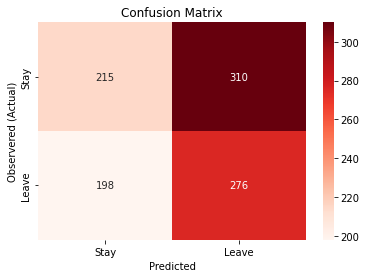

In [ ]:
#Create a heatmap from our confusion matrix
cm = sns.heatmap(megatelco_tree_matrix, annot=True, fmt='d',cmap='Reds')

cm.set_title('Confusion Matrix');
cm.set_xlabel('Predicted')
cm.set_ylabel('Observered (Actual)');

cm.xaxis.set_ticklabels(['Stay','Leave'])
cm.yaxis.set_ticklabels(['Stay','Leave'])

## Calculate Profit

Using the confusion matrix in the previous question how much profit (revenue - costs) could be expected with these costs-benefits?

For MegaTelCo we will assume benefit (revenue) = 800 and cost = 200.  TPs are a benefit, FPs are a cost. Again, we ignore those predicted to stay. (The cost-benefit numbers will be different in the AdviseInvest case! )

Why are TPs a benefit? In the MegaTelCo scenario, these are customers who are predicted to leave and actually were going to leave. If your marketing campaign is successful, then you can convince them to stay, thereby saving the company money. (In the AdviseInvest scenario, TPs are customers that you have predicted will answer the phone and do answer, thus providing an opportunity for your sales reps to make a sale.)

**Assume you can save 100% of the people who were actually going to leave.**  

In [ ]:
# True leavers * 600 -> You rescued these leave-leave people
# False leavers * 200 -> You wasted your money on the leave-stay people since they weren't actually going to leave
276 * (800-200) - 310 * 200

103600

For reference, if you gave everyone the $800 incentive to stay (no model at all) you would have a 49% chance of being right.  We will do a rough calculation using 20% of the population counts to compare to our test group.

In [ ]:
df_clean[['id','leave']].groupby('leave').count()*0.20

,id
leave,
LEAVE,493.6
STAY,505.2


In [ ]:
# True leavers * 600 -> You rescued these people
# False leavers * 200 -> You wasted your money since they weren't actually going to leave
494 * (800-200) - 505 * 200

195400

## Fine tune the model

Adjust the threshold for giving offers down to 0.2.  What happens to profit?

The default threshold is 0.5 or 50% likely to make a choice.  If we adjust to 0.20, we are looking for customers with even a 20% chance of leaving.   This will lead to more offers being made and more false positives.  



In [ ]:


megatelco2_tree = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Create Decision Tree Classifer
megatelco2_tree = megatelco2_tree.fit(x_train,y_train)

# Use the tree to predict "leave"
y_predict2 = (megatelco2_tree.predict_proba(x_test)[:,1] >= 0.2)


# create a confusion matrix
megatelco2_matrix = confusion_matrix(y_test, y_predict2)
print(megatelco2_matrix)

 

[[185 340]
 [ 41 433]]


## Create a new confusion matrix

[Text(0, 0.5, 'Stay'), Text(0, 1.5, 'Leave')]

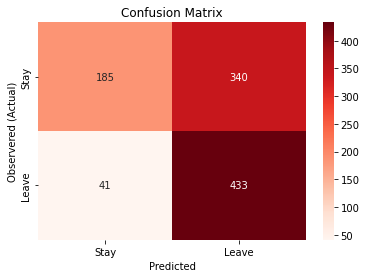

In [ ]:
import seaborn as sns

#Create a heatmap from our confusion matrix
cm = sns.heatmap(megatelco2_matrix , annot=True, fmt='d',cmap='Reds')

cm.set_title('Confusion Matrix');
cm.set_xlabel('Predicted')
cm.set_ylabel('Observered (Actual)');

cm.xaxis.set_ticklabels(['Stay','Leave'])
cm.yaxis.set_ticklabels(['Stay','Leave'])


## Calculate profite for new model

In [ ]:
# True leavers * 600 -> You rescued these leave-leave people
# False leavers * 200 -> You wasted your money on the leave-stay people since they weren't actually going to leave
( 433 * (800-200)) - (340 * 200)

191800

# Did your model improve profit?
👎 👍